<a href="https://colab.research.google.com/github/rajlm10/D2L-Torch/blob/main/D2L_NWKR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l
#Restart runtime

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# Generating synthetic data according to 
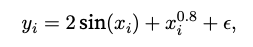

In [2]:
n_train = 50 # No. of training examples
x_train,_=torch.sort(torch.rand(n_train) * 5)

In [3]:
def f(x):
  return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,)) # Training outputs 
x_test = torch.arange(0, 5, 0.1) # Testing examples
y_test = f(x_test) # Ground-truth outputs for the testing examples
n_test = len(x_test) # No. of testing examples
n_test

x_train[:5],y_train[:5],x_test[:5],y_test[:5]

(tensor([0.1111, 0.1125, 0.2375, 0.2529, 0.2587]),
 tensor([-0.0118,  0.6425,  0.7679,  0.7221,  0.3175]),
 tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000]),
 tensor([0.0000, 0.3582, 0.6733, 0.9727, 1.2593]))

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

(torch.Size([50]), torch.Size([50]), torch.Size([50]), torch.Size([50]))

In [5]:
def plot_kernel_reg(y_hat):
  d2l.plot(x_test, [y_test, y_hat], 'x', 'y', legend=['Truth', 'Pred'],xlim=[0, 5], ylim=[-1, 5]) 
  d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

# Average Pooling 

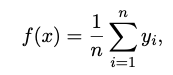

In [6]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
y_hat,y_hat.shape 

(tensor([2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577,
         2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577,
         2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577,
         2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577,
         2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577, 2.1577,
         2.1577, 2.1577, 2.1577, 2.1577, 2.1577]), torch.Size([50]))

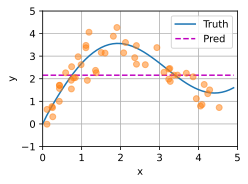

In [7]:
plot_kernel_reg(y_hat)

# Non-parametric Attention Pooling

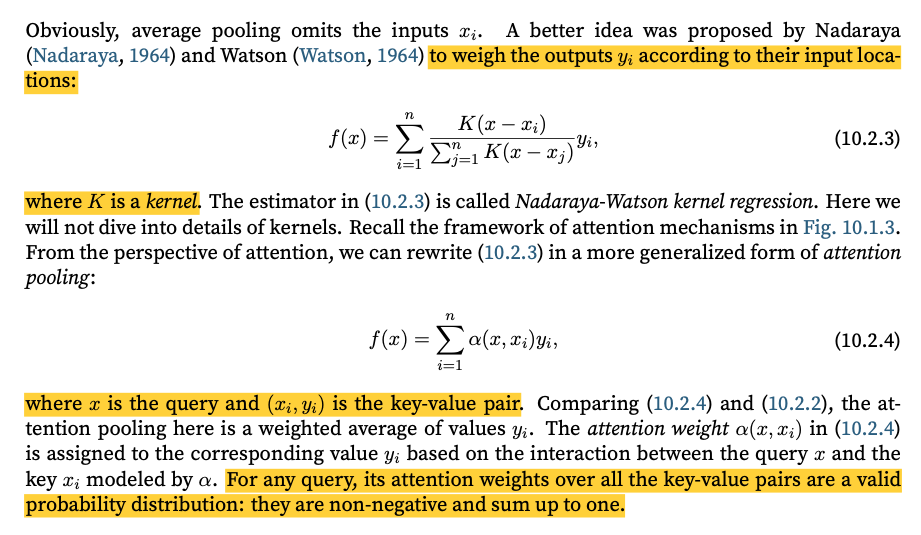

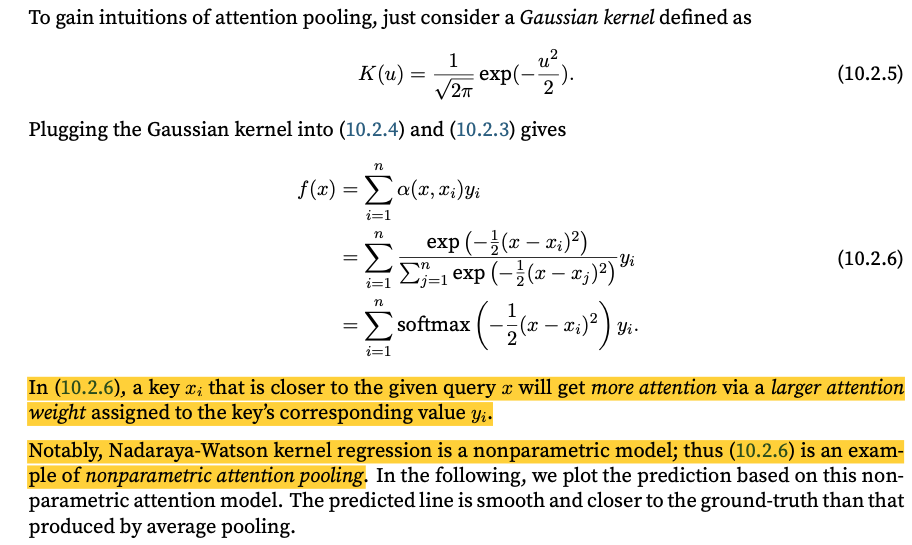

In [8]:
x_test

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
        2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
        3.6000, 3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000,
        4.5000, 4.6000, 4.7000, 4.8000, 4.9000])

In [9]:
x_test.repeat_interleave(n_train),x_test.repeat_interleave(n_train).shape #Repeats every value in x_test n_train i.e 50 times
# Thus we get n_test * n_train values 

(tensor([0.0000, 0.0000, 0.0000,  ..., 4.9000, 4.9000, 4.9000]),
 torch.Size([2500]))

In [10]:
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
X_repeat # n_test X n_train

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
        ...,
        [4.7000, 4.7000, 4.7000,  ..., 4.7000, 4.7000, 4.7000],
        [4.8000, 4.8000, 4.8000,  ..., 4.8000, 4.8000, 4.8000],
        [4.9000, 4.9000, 4.9000,  ..., 4.9000, 4.9000, 4.9000]])

x_repeat->queries

x_train->keys

y_train->values

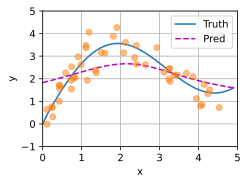

In [11]:
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1) #Softmax along keys dimension
# Each element of `y_hat` is weighted average of values, where weights are attention weights
y_hat = torch.matmul(attention_weights, y_train) #(n_test X n_train) X n_train -> n_test
plot_kernel_reg(y_hat)

# Parametric Attention-Pooling

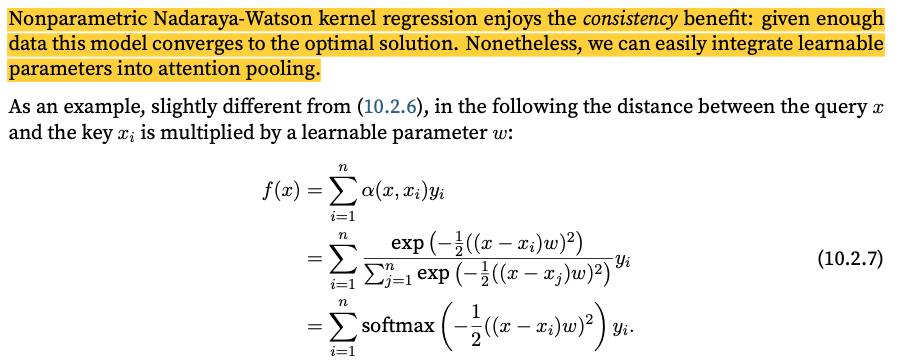

In [13]:
X_tile = x_train.repeat((n_train, 1))
X_tile.shape #n_train X n_train

torch.Size([50, 50])

In [16]:
display(x_train)
display(X_tile)

tensor([0.1111, 0.1125, 0.2375, 0.2529, 0.2587, 0.4265, 0.4294, 0.4307, 0.4336,
        0.5896, 0.7331, 0.7373, 0.7436, 0.7917, 0.8369, 0.9102, 0.9862, 1.1098,
        1.1108, 1.1462, 1.1893, 1.3563, 1.3749, 1.5033, 1.6012, 1.8138, 1.9055,
        2.0789, 2.1252, 2.3626, 2.4052, 2.4074, 2.6340, 2.9313, 3.1131, 3.2349,
        3.2370, 3.2634, 3.2745, 3.3682, 3.4605, 3.6875, 3.8608, 3.9442, 4.0500,
        4.0900, 4.1453, 4.2370, 4.2856, 4.5303])

tensor([[0.1111, 0.1125, 0.2375,  ..., 4.2370, 4.2856, 4.5303],
        [0.1111, 0.1125, 0.2375,  ..., 4.2370, 4.2856, 4.5303],
        [0.1111, 0.1125, 0.2375,  ..., 4.2370, 4.2856, 4.5303],
        ...,
        [0.1111, 0.1125, 0.2375,  ..., 4.2370, 4.2856, 4.5303],
        [0.1111, 0.1125, 0.2375,  ..., 4.2370, 4.2856, 4.5303],
        [0.1111, 0.1125, 0.2375,  ..., 4.2370, 4.2856, 4.5303]])

In [17]:
Y_tile = y_train.repeat((n_train, 1))
Y_tile.shape #n_train X n_train

torch.Size([50, 50])

In [30]:
display(y_train)
display(Y_tile)

tensor([-0.0118,  0.6425,  0.7679,  0.7221,  0.3175,  1.0009,  1.7130,  1.5699,
         1.7042,  2.2646,  1.9329,  1.5489,  2.5344,  2.0379,  2.0497,  2.9748,
         2.6229,  3.3719,  3.4764,  1.9288,  4.0589,  2.3711,  2.2650,  3.1596,
         3.1370,  3.8807,  4.2684,  3.1485,  3.6051,  2.9336,  3.4685,  2.6439,
         2.6219,  3.3790,  2.2864,  1.9812,  2.4302,  2.4538,  1.8819,  2.1598,
         2.1621,  2.2447,  2.0865,  1.1202,  0.7909,  0.8565,  1.7471,  1.3388,
         1.5084,  0.7259])

tensor([[-0.0118,  0.6425,  0.7679,  ...,  1.3388,  1.5084,  0.7259],
        [-0.0118,  0.6425,  0.7679,  ...,  1.3388,  1.5084,  0.7259],
        [-0.0118,  0.6425,  0.7679,  ...,  1.3388,  1.5084,  0.7259],
        ...,
        [-0.0118,  0.6425,  0.7679,  ...,  1.3388,  1.5084,  0.7259],
        [-0.0118,  0.6425,  0.7679,  ...,  1.3388,  1.5084,  0.7259],
        [-0.0118,  0.6425,  0.7679,  ...,  1.3388,  1.5084,  0.7259]])

**In the following, we transform the training dataset to keys and values to train the attention model. In the parametric attention pooling, any training input takes key-value pairs from all the training examples except for itself to predict its output.**

In [19]:
(1 - torch.eye(n_train)).type(torch.bool),(1 - torch.eye(n_train)).type(torch.bool).shape

(tensor([[False,  True,  True,  ...,  True,  True,  True],
         [ True, False,  True,  ...,  True,  True,  True],
         [ True,  True, False,  ...,  True,  True,  True],
         ...,
         [ True,  True,  True,  ..., False,  True,  True],
         [ True,  True,  True,  ...,  True, False,  True],
         [ True,  True,  True,  ...,  True,  True, False]]),
 torch.Size([50, 50]))

In [24]:
#Essentially what we are doing here is removing one entry from each column for each row

X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1)),X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1)).shape

(tensor([[0.1125, 0.2375, 0.2529,  ..., 4.2370, 4.2856, 4.5303],
         [0.1111, 0.2375, 0.2529,  ..., 4.2370, 4.2856, 4.5303],
         [0.1111, 0.1125, 0.2529,  ..., 4.2370, 4.2856, 4.5303],
         ...,
         [0.1111, 0.1125, 0.2375,  ..., 4.1453, 4.2856, 4.5303],
         [0.1111, 0.1125, 0.2375,  ..., 4.1453, 4.2370, 4.5303],
         [0.1111, 0.1125, 0.2375,  ..., 4.1453, 4.2370, 4.2856]]),
 torch.Size([50, 49]))

In [25]:
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

queries come from x_train

keys come from x_train where the values of x_train are repeated in n_train new rows and in each row 'i' value 'i' is removed thus giving us a matrix of dimensions n_train X n_train -1 

similarly to the keys, values come from y_train (the rest of the procedure is the same)

Inside the forward function, queries are transformed to a shape n_train X n_train-1, by repeating each value in x_train (n_train-1 times).

So now the attention weights are the same dimension. Essentially in each row of the attention matrix we take one value from x_train broadcast it n_train-1 times and subtract from this broadcast all values other than itself in x_train (coming from the keys), thus performing n_train-1 subtractions and multiply each of these subtractions by w.

Note how w here is a single scalar value (learnable)

Now we multiply each of these rows in attention weights with each of the columns in values (each column i contains the value i from y_train).

We finally get (n_train,1,n_train-1) X (n_train,n_train-1,1)-> (n_train,1,1)
which is our y_hat





In [38]:
class NWKernelRegression(nn.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.w = nn.Parameter(torch.rand((1,), requires_grad=True))
  
  def forward(self, queries, keys, values):
    #q->(n_train) k->(n_train,n_train-1) v->(n_train,n_train-1)
    queries=queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
    #q-> n_train X n_train-1 

    self.attention_weights = nn.functional.softmax(-((queries - keys) * self.w)**2 / 2, dim=1)
    #attention_weights-> n_train X n_train-1 
    
    return torch.bmm(self.attention_weights.unsqueeze(1),values.unsqueeze(-1)).reshape(-1)

In [39]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)

In [40]:
for epoch in range(5):
  trainer.zero_grad()
  l = loss(net(x_train, keys, values), y_train) 
  l.sum().backward()
  trainer.step()
  print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}') 

epoch 1, loss 50.064777
epoch 2, loss 13.638727
epoch 3, loss 13.637625
epoch 4, loss 13.636561
epoch 5, loss 13.635541


##Prediction

Note how we don't remove any examples during inference from keys and values

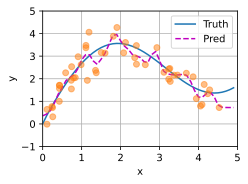

In [41]:
keys = x_train.repeat((n_test, 1))
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach() 
plot_kernel_reg(y_hat)